# Data Analytics Fall 2023 Final Exam

<b>Penalties:</b> You will incur penalties if:
<ul>
<li>The answer is wrong</li>
<li>The code is wrong</li>
<li>The code does not work on different data (aka, hard coding)</li>
<li>The code generates errors while re-run</li>
</ul>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
# %pylab inline
import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus

# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore')

In [113]:
df = pd.read_csv('US_crime_rate_2016_2017.csv', thousands=',')

In [114]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 200)

<p>This data set reports information from 2016 to 2017, Offenses Reported to Law Enforcement by State by City 100,000 and over in population. The data set has the following columns:			
<ul>
<li><b>State</b> 
<li><b>City</b>
<li><b>Year</b> 
<li><b>Population</b> 
<li><b>Violent crime</b> 
<li><b>Murder</b>
<li><b>Rape</b>
<li><b>Robbery</b> 
<li><b>Aggravated assault</b> 
<li><b>Property crime</b>
<li><b>Burglary</b>
<li><b>Larceny-theft</b>
<li><b>Motor vehicle theft</b>
<li><b>Arson</b>
</ul></p>


In [115]:
df.head()

,State,City,Year,Population,Violent crime,Murder,Rape,Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson
0,ALABAMA,BIRMINGHAM,2016,212549.0,1732,44,75,460,1153,5875,1318,3807,750,76
1,NaN,NaN,2017,NaN,1829,42,92,472,1223,6458,1292,4350,816,87
2,NaN,MOBILE,2016,249921.0,793,18,47,181,547,5169,1100,3724,345,45
3,NaN,NaN,2017,NaN,925,20,53,235,617,6482,1507,4344,631,51
4,NaN,MONTGOMERY,2016,199565.0,563,18,42,187,316,4229,1043,2790,396,35


In [116]:
df.isna().any()

State                   True
City                    True
Year                   False
Population              True
Violent crime          False
Murder                 False
Rape                   False
Robbery                False
Aggravated assault     False
Property crime         False
Burglary               False
Larceny-theft          False
Motor vehicle theft    False
Arson                  False
dtype: bool

### There are many NaN in this data set, let's clean them first. 

For 'State' and 'City' columns, let's use method .fillna() with 'forward fill' option to fill them. 

In [117]:
df.State.fillna(method='ffill',inplace=True)

In [118]:
df.City.fillna(method='ffill',inplace=True)

In [119]:
df.head(10)

,State,City,Year,Population,Violent crime,Murder,Rape,Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson
0,ALABAMA,BIRMINGHAM,2016,212549.0,1732,44,75,460,1153,5875,1318,3807,750,76
1,ALABAMA,BIRMINGHAM,2017,NaN,1829,42,92,472,1223,6458,1292,4350,816,87
2,ALABAMA,MOBILE,2016,249921.0,793,18,47,181,547,5169,1100,3724,345,45
3,ALABAMA,MOBILE,2017,NaN,925,20,53,235,617,6482,1507,4344,631,51
4,ALABAMA,MONTGOMERY,2016,199565.0,563,18,42,187,316,4229,1043,2790,396,35
5,ALABAMA,MONTGOMERY,2017,NaN,656,19,35,185,417,4246,1031,2797,418,41
6,ALASKA,ANCHORAGE,2016,299097.0,1692,9,302,326,1055,6853,1031,4901,921,38
7,ALASKA,ANCHORAGE,2017,NaN,1707,13,196,369,1129,7708,1089,5180,1439,31
8,ARIZONA,CHANDLER,2016,265922.0,272,1,61,69,141,2987,453,2373,161,8
9,ARIZONA,CHANDLER,2017,NaN,303,1,67,72,163,2906,401,2298,207,10


### Let's do more data clean up in Q1 before we perform further analysis.

### <div class="alert alert-block alert-info"> Note: All questions need to consider both 2016 and 2017 records unless being specified otherwise. </div>

## Q1 (10 pts)

### Q1.1, How many NaN still exists in this data set ?

In [120]:
nan_count = df.isna().sum().sum()
nan_count

230

### Q1.2, Which colum still has NaN ?
Note: display the column name in a list

In [121]:
nan_columns = df.columns[df.isna().any()].tolist()
nan_columns


['Population']

### Q1.3 For the column ‘Population’,  assuming  each city's population stays the same from 2016 to 2017. Fill in the NaN based on above assumption. Verify there is no more NaN after the above step.

In [126]:
def fill_population(row, previous_year_data):
    if pd.isna(row['Population']) and row['Year'] == 2017:
        city = row['City']
        if city in previous_year_data:
            return previous_year_data[city]
    return row['Population']

In [127]:
population_2016 = df[df['Year'] == 2016].set_index('City')['Population'].to_dict()

In [128]:
df['Population'] = df.apply(lambda row: fill_population(row, population_2016), axis=1)

In [134]:
nan_remaining = df['Population'].isnull().any()
nan_remaining

False

### Q1.4, How many different unique 'State' are in this data set ?

In [135]:
unique_states_count = df['State'].nunique()
unique_states_count


42

## Q2, general investigation (10 pts)

### Q2.1, What's the most popular City name in this data set?

In [137]:
most_common_city = df['City'].mode()[0]
most_common_city

'SPRINGFIELD'

### Q2.2, Based on above question, which State(s) has that City name ? Show the State(s).
Hint 1: No hard coding

In [244]:
states_with_springfield = df[df['City'] == most_common_city]['State'].unique()
states_with_springfield

array(['ILLINOIS', 'MASSACHUSETTS', 'MISSOURI'], dtype=object)

In [245]:
df.head()

,State,City,Year,Population,Violent crime,Murder,Rape,Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson,Safe City,ViolentCrimeCategory
0,ALABAMA,BIRMINGHAM,2016,212549.0,1732,44,75,460,1153,5875,1318,3807,750,76,False,>967
1,ALABAMA,BIRMINGHAM,2017,212549.0,1829,42,92,472,1223,6458,1292,4350,816,87,False,>967
2,ALABAMA,MOBILE,2016,249921.0,793,18,47,181,547,5169,1100,3724,345,45,True,<=967
3,ALABAMA,MOBILE,2017,249921.0,925,20,53,235,617,6482,1507,4344,631,51,True,<=967
4,ALABAMA,MONTGOMERY,2016,199565.0,563,18,42,187,316,4229,1043,2790,396,35,True,<=967


### Q2.3, How many different unique actual 'City' are in this data set?
Hint 1: Do not double count for Year 2016 and 2017

Hint 2: Same city name may exists in different States. So same city name in different states should be considered as different city.

In [141]:
unique_cities_count = df.drop_duplicates(subset=['State', 'City']).shape[0]
unique_cities_count

230

### Q2.4,  How many 'City' starts with letter 'M' ?
Note: Same city name but in different States should be count as different city

In [144]:
cities_starting_with_m = df[df['City'].str.startswith('M')].drop_duplicates(subset=['State', 'City']).shape[0]
cities_starting_with_m

15

## Q3, Mega City(10 pts)

### Q3.1  'Mega City' means that city's population is 10 times more than the average city population. What city(ies) are qualified as Mega City ? Show the city(ies) name.

In [147]:
average_city_population = df['Population'].mean()

In [148]:
mega_city_threshold = 10 * average_city_population

In [149]:
mega_cities = df[df['Population'] >= mega_city_threshold]['City'].unique()
mega_cities

array(['LOS ANGELES', 'NEW YORK'], dtype=object)

### Q3.2 For the above Mega City(ies), which city has the highest aggravated assault? (answer needs to be a string)

In [151]:
if len(mega_cities) > 0:
    city_highest_assault = df[df['City'].isin(mega_cities)].sort_values(by='Aggravated assault', ascending=False)['City'].iloc[0]
else:
    city_highest_assault = "No Mega Cities"

city_highest_assault

'NEW YORK'

## Q4 Motor Vehicle Theft (10 pts)

### Q4.1 What's the top 5 states with highest total motor vehicle theft ? List the states and the number of motor vehicle theft counts from high to low. 

In [152]:
total_motor_vehicle_thefts_by_state = df.groupby('State')['Motor vehicle theft'].sum()

In [154]:
top_5_states_motor_vehicle_theft = total_motor_vehicle_thefts_by_state.sort_values(ascending=False).head(5)
top_5_states_motor_vehicle_theft

State
CALIFORNIA    99685
FLORIDA       14429
ILLINOIS      12011
COLORADO      10757
WASHINGTON    10565
Name: Motor vehicle theft, dtype: int64

### Q4.2 Based on the above question, within the State which has the highest total Motor Vehicle Theft,  what's the top 3 cities which have the highest total motor vehicle theft? List the 'City' names and the number of motor vehicle theft counts in descending order.
Note: No hard coding

In [240]:
cali_data = df[df['State'] == 'CALIFORNIA']

In [241]:
total_motor_vehicle_thefts_by_city = cali_data.groupby('City')['Motor vehicle theft'].sum()


In [242]:
top_3_cities_motor_vehicle_theft = total_motor_vehicle_thefts_by_city.sort_values(ascending=False).head(3)
top_3_cities_motor_vehicle_theft

City
LOS ANGELES    18444
SAN JOSE        7351
OAKLAND         6587
Name: Motor vehicle theft, dtype: int64

## Q5 (10 pts)

### Q5.1, Consider 'SANTA CLARA' City only. Show the total number of 'Robbery', 'Burglary' and 'Motor vehicle theft' in one table.

Note: This table should have 3 columns and 1 row(only)

In [161]:
santa_clara_totals = df[df['City'] == 'SANTA CLARA'][['Robbery', 'Burglary', 'Motor vehicle theft']].sum().to_frame().transpose()
santa_clara_totals

,Robbery,Burglary,Motor vehicle theft
0,54,336,359


### Q5.2, For the cities that have more than 10,000 'Violent crime' each year, in one table, report the 'City' names and the total 'Murder' count in descending order.

In [162]:
s_high_violent_crime = df[df['Violent crime'] > 10000]

In [164]:
cities_murder_count = cities_high_violent_crime.groupby('City')['Murder'].sum().sort_values(ascending=False).reset_index()
cities_murder_count

,City,Murder
0,CHICAGO,651
1,NEW YORK,289
2,LOS ANGELES,273


## Q6 (10 pts)

### Q6.1, From the 'Aggravated assault' point of view, find the top 3 safest cities. List the State, City and the sum of the aggravated assault by aggravated assault number in ascending order.

In [165]:
safest_cities_assault = df.groupby(['State', 'City'])['Aggravated assault'].sum().nsmallest(3).reset_index()
safest_cities_assault ## for safest cities: Aggravated assault with nsmallest

,State,City,Aggravated assault
0,CALIFORNIA,MURRIETA,32
1,GEORGIA,SANDY SPRINGS,38
2,NEW JERSEY,WOODBRIDGE TOWNSHIP,39


### Q6.2, For each State, report (1) how many cities are in that state(rename it to 'City_count').  (2) Among all the populations in those cities(in that state), show the max population, min population and the difference between the max and min (rename it to 'spread_Population'). All answers need to be in one table, showing the first 5 States only.  
#### Hint: don't double count the city 

In [170]:
state_stats = df.drop_duplicates(subset=['State', 'City']).groupby('State').agg(
    City_count=('City', 'count'),
    Max_population=('Population', 'max'),
    Min_population=('Population', 'min')
)

In [171]:
state_stats['spread_Population'] = state_stats['Max_population'] - state_stats['Min_population']

In [172]:
first_5_states_stats = state_stats.head(5)
first_5_states_stats


,City_count,Max_population,Min_population,spread_Population
State,,,,
ALABAMA,3,249921.0,199565.0,50356.0
ALASKA,1,299097.0,299097.0,0.0
ARIZONA,6,478277.0,130679.0,347598.0
ARKANSAS,1,198800.0,198800.0,0.0
CALIFORNIA,73,4007905.0,101316.0,3906589.0


## Q7 (10 pts)

### Q7.1, Plot a bar chart to show the top 5 states with the highest 'Arson' count.

In [173]:
import matplotlib.pyplot as plt

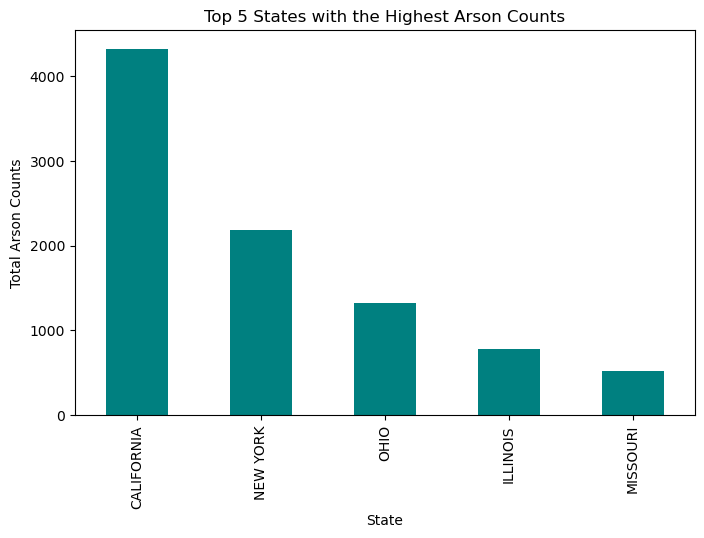

In [174]:
total_arson_by_state = df.groupby('State')['Arson'].sum()

top_5_states_arson = total_arson_by_state.sort_values(ascending=False).head(5)

plt.figure(figsize=(8, 5))
top_5_states_arson.plot(kind='bar', color='teal')
plt.title('Top 5 States with the Highest Arson Counts')
plt.xlabel('State')
plt.ylabel('Total Arson Counts')
plt.xticks(rotation=90)
plt.show();


### Q7.2, Based on correlations, find the top 3 pairs of crimes that have the strongest correlations to each other.
#### Hint: use .corr()

In [177]:
crime_data = df[['Violent crime', 'Murder', 'Rape', 'Robbery', 'Aggravated assault', 'Property crime', 'Burglary', 'Larceny-theft', 'Motor vehicle theft', 'Arson']]

In [239]:
crime_correlations = crime_data.corr()

In [178]:
correlation_pairs = crime_correlations.unstack().sort_values(ascending=False)

In [179]:
correlation_pairs = correlation_pairs[correlation_pairs < 1]

In [180]:
top_3_correlation_pairs = correlation_pairs.drop_duplicates().head(3)
top_3_correlation_pairs


Violent crime  Aggravated assault    0.992880
Larceny-theft  Property crime        0.987585
Robbery        Violent crime         0.984274
dtype: float64

## Q8 Crime Index (10 pts)

### Q8.1, Consider Year 2017 ONLY.   Assuming 'crime_index' is calculated as:  'crime_index' = 'Violent crime' + 'Aggravated assault' + 'Property crime' + 'Robbery'.  Show the State, City and crime_index for the cities with the highest crime_index. 

In [184]:
data_2017 = df[df['Year'] == 2017]

In [185]:
data_2017['crime_index'] = data_2017['Violent crime'] + data_2017['Aggravated assault'] + data_2017['Property crime'] + data_2017['Robbery']

In [187]:
highest_crime_index_cities = data_2017.sort_values(by='crime_index', ascending=False)[['State', 'City', 'crime_index']]
highest_crime_index_cities.head()

,State,City,crime_index
359,NEW YORK,NEW YORK,101044
85,CALIFORNIA,LOS ANGELES,77652
253,ILLINOIS,CHICAGO,68176
399,PENNSYLVANIA,PHILADELPHIA,36739
129,CALIFORNIA,SAN FRANCISCO,33571


### Q8.2, Based on above question, now take the 'Population' into consideration. Let's define a 'normalized_crime_index' = (crime_index/population)*100. List the top 3 cities which have the highest normalized_crime_index. Show the State, City and normalized_crime_index only.

In [190]:
data_2017['normalized_crime_index'] = (data_2017['crime_index'] / data_2017['Population']) * 100

In [192]:
top_3_normalized_crime_index_cities = data_2017.sort_values(by='normalized_crime_index', ascending=False)[['State', 'City', 'normalized_crime_index']].head(3)
top_3_normalized_crime_index_cities

,State,City,normalized_crime_index
325,MISSOURI,SPRINGFIELD,5.661678
21,ARKANSAS,LITTLE ROCK,5.153421
417,TENNESSEE,MEMPHIS,4.770015


## Q9 (10 pts)

### Q9.1, For each city in California, compare the 'Violent crime' counts between year 2016 and 2017. Find the top 5 cities with the largest differences. Show the city names and the 'Violent crime' count differences. 

In [199]:
california_data = df[df['State'] == 'CALIFORNIA']

Describe as pivot_table

In [202]:
california_pivot = california_data.pivot_table(index='City', columns='Year', values='Violent crime', aggfunc='sum')

In [203]:
california_pivot['crime_difference'] = california_pivot[2017] - california_pivot[2016]

top_5_violent_crime_difference = california_pivot['crime_difference'].sort_values(ascending=False).head(5)
top_5_violent_crime_difference.reset_index()

,City,crime_difference
0,LOS ANGELES,228
1,LONG BEACH,146
2,VICTORVILLE,97
3,POMONA,88
4,SAN FRANCISCO,82


### Q9.2 Based on above analysis, which City(ies) violent crime count remained the same from 2016 to 2017? 
#### Hint: remain the same = no increase nor decrease 

In [219]:
california_data.head(2)

,State,City,Year,Population,Violent crime,Murder,Rape,Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson
22,CALIFORNIA,ANAHEIM,2016,353504.0,620,4,70,183,363,5151,759,3677,715,17
23,CALIFORNIA,ANAHEIM,2017,353504.0,601,6,63,218,314,4629,652,3190,787,16


In [220]:
california_data_2016_2017 = california_data[california_data['Year'].isin([2016, 2017])]
california_data_2016_2017.head(2)

,State,City,Year,Population,Violent crime,Murder,Rape,Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson
22,CALIFORNIA,ANAHEIM,2016,353504.0,620,4,70,183,363,5151,759,3677,715,17
23,CALIFORNIA,ANAHEIM,2017,353504.0,601,6,63,218,314,4629,652,3190,787,16


In [221]:
california_pivot_same = california_data_2016_2017.pivot_table(index='City', columns='Year', values='Violent crime', aggfunc='sum')

In [222]:
cities_same_violent_crime = california_pivot_same[california_pivot_same[2016] == california_pivot_same[2017]].dropna().index.tolist()
cities_same_violent_crime

['CONCORD', 'SANTA CLARA']

## Q10 (10 pts) 

### Q10.1, Assuming a 'Safe City' is a city with 'Violent crime' <= ('Violent crime' national average). Use 'Safe City' as target variable Y, build and train a 2-levels DecisionTree.  Show the resulting decision tree and draw conclusion to the 4 end nodes respectively”
 
#### Note 1: Drop the 'City', 'Year' columns before training. 
#### Note 2: Drop all columns you introduced into the data set except 'Safe City'
#### Note 3: Leverage pd.get_dummies()

In [223]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [226]:
violent_crime_national_average = df['Violent crime'].mean()

In [227]:
df['Safe City'] = df['Violent crime'] <= violent_crime_national_average

In [228]:
df_prepared = df.drop(['City', 'Year'], axis=1)

In [229]:
df.head(2)

,State,City,Year,Population,Violent crime,Murder,Rape,Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson,Safe City
0,ALABAMA,BIRMINGHAM,2016,212549.0,1732,44,75,460,1153,5875,1318,3807,750,76,False
1,ALABAMA,BIRMINGHAM,2017,212549.0,1829,42,92,472,1223,6458,1292,4350,816,87,False


In [230]:
df_prepared = df_prepared[['State', 'Population', 'Violent crime', 'Murder', 'Rape', 'Robbery', 
                           'Aggravated assault', 'Property crime', 'Burglary', 'Larceny-theft', 
                           'Motor vehicle theft', 'Arson', 'Safe City']]

In [231]:
df_prepared = pd.get_dummies(df_prepared, drop_first=True)

DecisionTreeClassifier(max_depth=2)

<Figure size 1000x700 with 0 Axes>

[Text(0.5, 0.75, 'Violent crime <= 967.0\ngini = 0.357\nsamples = 460\nvalue = [107, 353]\nclass = Safe'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 353\nvalue = [0, 353]\nclass = Safe'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 107\nvalue = [107, 0]\nclass = Not Safe')]

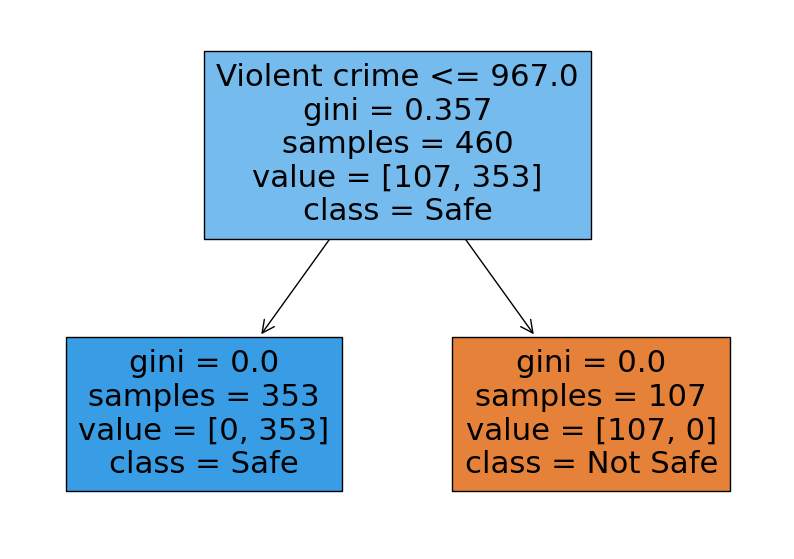

In [232]:
feature_names_list = X.columns.tolist()

X = df_prepared.drop('Safe City', axis=1)
y = df_prepared['Safe City']

dt_classifier = DecisionTreeClassifier(max_depth=2)

dt_classifier.fit(X, y)

plt.figure(figsize=(10, 7))
plot_tree(dt_classifier, filled=True, feature_names=feature_names_list, class_names=['Not Safe', 'Safe'])
plt.show()

#### Conclusion:

**Professor, I'm trying to draw the max_depth=2, but it did not show 4end nodes because I'm thinking that the algorithm may choose not to split, resulting in fewer leaf nodes than the maximum possible for a given depth.**

So my conclusion is that the decision tree has determined that cities with 'Violent crime' counts less than or equal to 967 are 'Safe', and those with counts higher than 967 are 'Not Safe', based on the data provided to the model.

### Q10.2, Use two graphs to prove the Decision Tree had made a good decision on selecting those criterias. Provide a conclusion for each graph.

#### Hint: generate new columns by using pd.cut with specific size of bins based on DecisionTree's output

In [234]:
df.head(2)

,State,City,Year,Population,Violent crime,Murder,Rape,Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson,Safe City
0,ALABAMA,BIRMINGHAM,2016,212549.0,1732,44,75,460,1153,5875,1318,3807,750,76,False
1,ALABAMA,BIRMINGHAM,2017,212549.0,1829,42,92,472,1223,6458,1292,4350,816,87,False


In [235]:
import seaborn as sns

#### Graph 1

In [236]:
df['ViolentCrimeCategory'] = pd.cut(df['Violent crime'], bins=[-float("inf"), 967, float("inf")], labels=['<=967', '>967'])

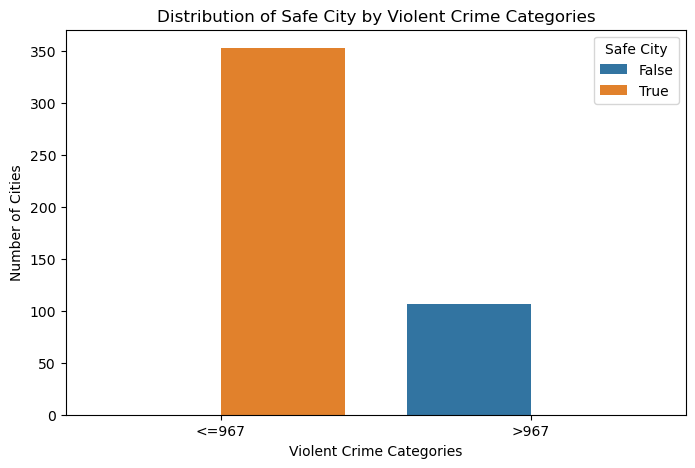

In [237]:
plt.figure(figsize=(8, 5))
sns.countplot(x='ViolentCrimeCategory', hue='Safe City', data=df)
plt.title('Distribution of Safe City by Violent Crime Categories')
plt.xlabel('Violent Crime Categories')
plt.ylabel('Number of Cities')
plt.show();

#### Conclusion 1:

The first graph demonstrates that all cities with 'Violent crime' counts of 967 or lower are classified as 'Safe' while those with higher counts are classified as 'Not Safe'.

This clear separation validates the Decision Tree's criterion for splitting and indicates a good decision, with no overlap.

#### Graph 2

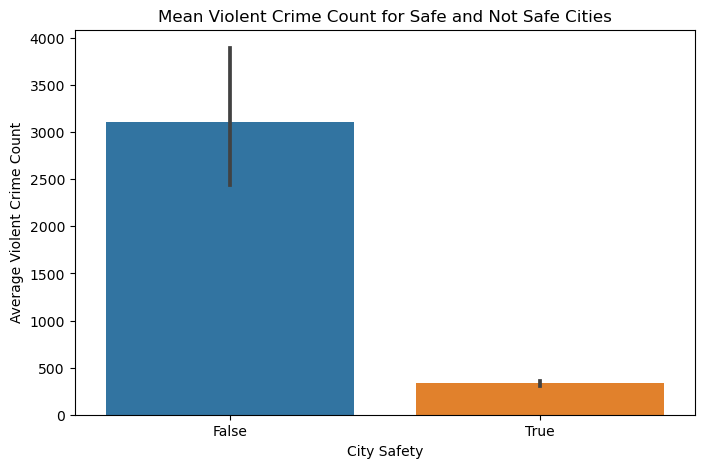

In [238]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Safe City', y='Violent crime', data=df)
plt.title('Mean Violent Crime Count for Safe and Not Safe Cities')
plt.xlabel('City Safety')
plt.ylabel('Average Violent Crime Count')
plt.show();

#### Conclusion 2:

The second graph explains that the average 'Violent crime' count is lower for 'Safe' cities compared to 'Not Safe' cities. This supports the Decision Tree's decision to use 'Violent crime' count as a criterion for determining city safety.

Moreover, the significant difference in means between the two categories suggests that 'Violent crime' count is a good predictor of city safety based on the Decision Tree model.

## Alan's comments:
* Q9.1, Should take the .abs() to get the correct answer. partial pts (-2.5 pts)
* Q10: Answers incorrect, partial pts (-8 pts)


Total deduction pts: -10.5

Final pts: 89.5 out of 100

